In [1]:
import os
import shap
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
shap.initjs()

In [2]:
df = pd.read_csv("/Users/nitishaggarwal/disease-prognosis/survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.GENDER.replace(['M', 'F'], [1, 0], inplace=True)

In [8]:
df.LUNG_CANCER.replace(['YES','NO'], [1,0], inplace= True)

In [9]:
df.SMOKING.replace([2,1], [1,0], inplace=True)

In [10]:
df['YELLOW_FINGERS'].replace([2,1], [1,0], inplace=True)

In [11]:
df.ANXIETY.replace([2,1], [1,0], inplace=True)

In [12]:
df.PEER_PRESSURE.replace([2,1], [1,0], inplace=True)

In [13]:
df['CHRONIC DISEASE'].replace([2,1], [1,0], inplace=True)

In [14]:
df['FATIGUE '].replace([2,1], [1,0], inplace=True)

In [15]:
df['ALLERGY '].replace([2,1], [1,0], inplace=True)

In [16]:
df.WHEEZING.replace([2,1], [1,0], inplace=True)

In [17]:
df['ALCOHOL CONSUMING'].replace([2,1], [1,0], inplace=True)

In [18]:
df.COUGHING.replace([2,1], [1,0], inplace=True)

In [19]:
df['SHORTNESS OF BREATH'].replace([2,1], [1,0], inplace=True)

In [20]:
df['SWALLOWING DIFFICULTY'].replace([2,1], [1,0], inplace=True)

In [21]:
df['CHEST PAIN'].replace([2,1], [1,0], inplace=True)

In [22]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Text(0.5, 1.0, 'Target Distribution')

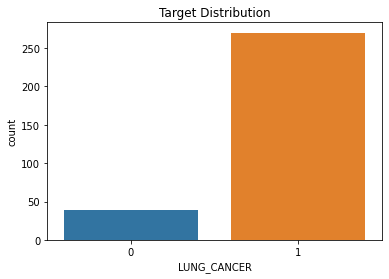

In [23]:
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Target Distribution')

In [24]:
df.LUNG_CANCER.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

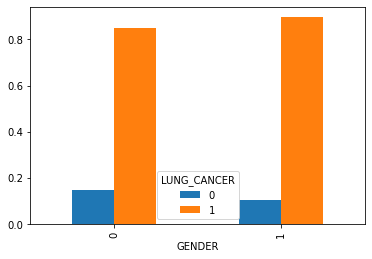

In [25]:
g = df.groupby('GENDER')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

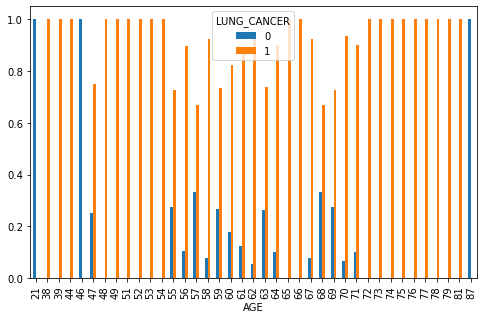

In [26]:
g = df.groupby('AGE')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

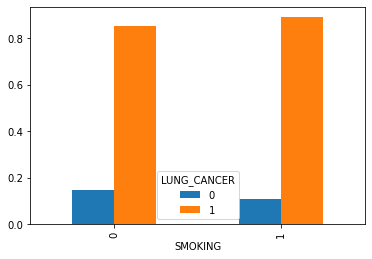

In [27]:
g = df.groupby('SMOKING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

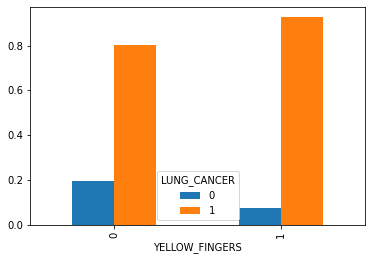

In [28]:
g = df.groupby('YELLOW_FINGERS')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

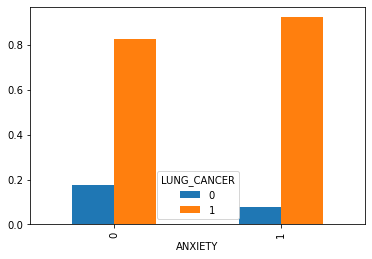

In [29]:
g = df.groupby('ANXIETY')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

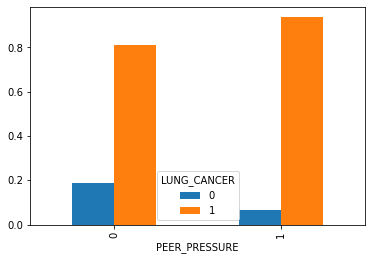

In [30]:
g = df.groupby('PEER_PRESSURE')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

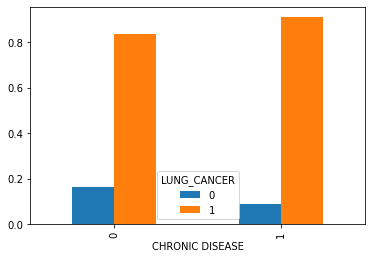

In [31]:
g = df.groupby('CHRONIC DISEASE')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

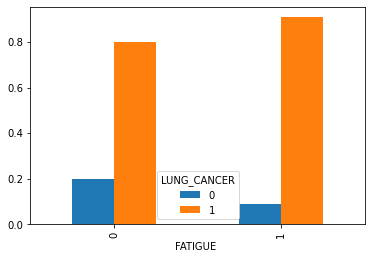

In [32]:
g = df.groupby('FATIGUE ')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

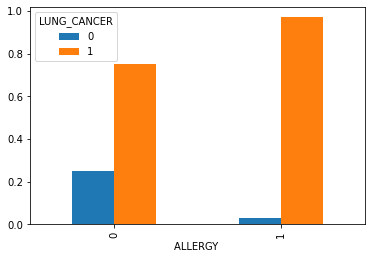

In [33]:
g = df.groupby('ALLERGY ')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

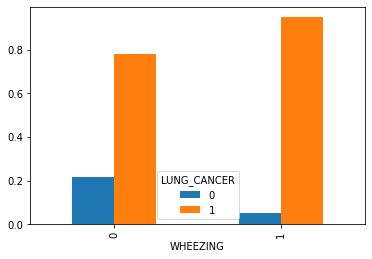

In [34]:
g = df.groupby('WHEEZING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

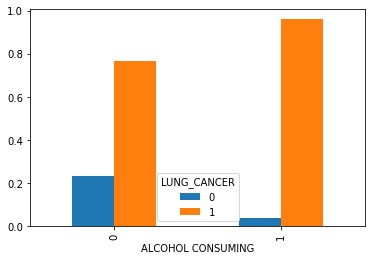

In [35]:
g = df.groupby('ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

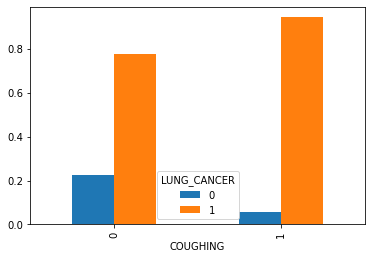

In [36]:
g = df.groupby('COUGHING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

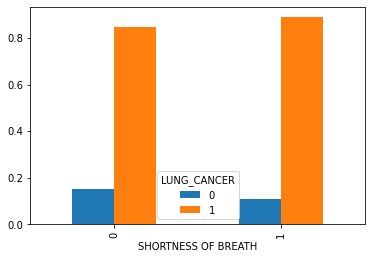

In [37]:
g = df.groupby('SHORTNESS OF BREATH')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

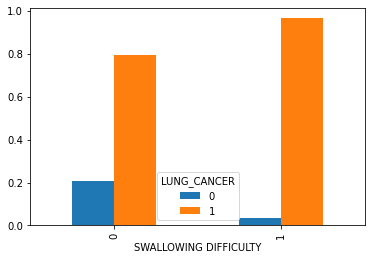

In [38]:
g = df.groupby('SWALLOWING DIFFICULTY')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

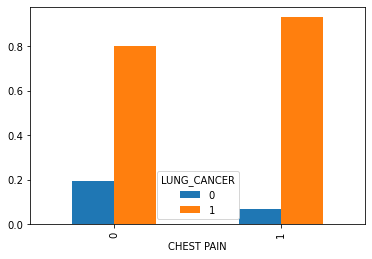

In [39]:
g = df.groupby('CHEST PAIN')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar')

In [40]:
df.drop (columns=['GENDER', 'AGE', 'SMOKING', 'SHORTNESS OF BREATH'], axis=1, inplace=True)

In [41]:
df.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0


In [42]:
df.shape

(309, 12)

In [43]:
Y=df.LUNG_CANCER
X=df.drop('LUNG_CANCER', axis=1)

In [44]:
#pip install -U imbalanced-learn

In [45]:
from imblearn.over_sampling import ADASYN

In [46]:
ada = ADASYN(random_state=42)

In [47]:
X_res, y_res = ada.fit_resample(X, Y)

In [48]:
X_res.shape

(553, 11)

In [49]:
y_res.shape

(553,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res,test_size= 0.20,random_state=0)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred= model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0])

In [53]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.96      0.94      0.95        50

    accuracy                           0.95       111
   macro avg       0.96      0.95      0.95       111
weighted avg       0.96      0.95      0.95       111



In [54]:
explainer_lg=shap.Explainer(model.predict, X_res, seed=3)
shap_val_lg=explainer_lg(X_res)

Permutation explainer: 554it [00:19, 15.17it/s]                         


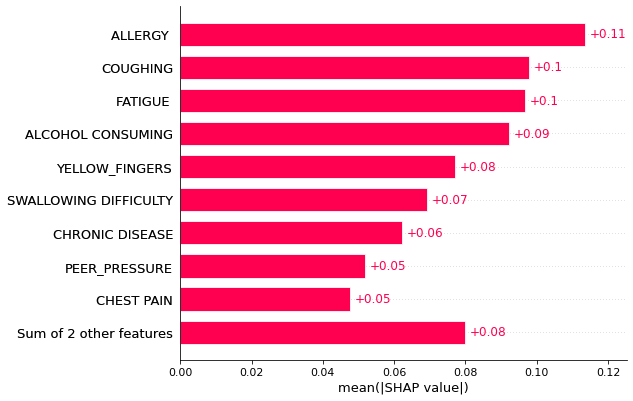

In [55]:
shap.plots.bar(shap_val_lg)

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
model_dtree=DecisionTreeClassifier(random_state=1)

In [58]:
param_grid={'criterion':['gini','entropy'], 'max_depth':[5,10,20], 'min_samples_split':[2,3,5]}
gridsearch_clf_dtree= GridSearchCV(estimator=model_dtree, param_grid=param_grid, verbose=3)
gridsearch_clf_dtree.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.955 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.989 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.910 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.910 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.955 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.989 total ti

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 3, 5]},
             verbose=3)

In [59]:
gridsearch_clf_dtree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [60]:
y_pred_test=gridsearch_clf_dtree.predict(X_test)

In [61]:
cl_report=classification_report(y_test,y_pred_test)

In [62]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        61
           1       0.94      0.92      0.93        50

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111



In [63]:
gridsearch_clf_dtree.best_estimator_.feature_importances_

array([0.04838059, 0.04357748, 0.03029793, 0.04920136, 0.09413591,
       0.42543559, 0.01824384, 0.05971605, 0.01205625, 0.21439397,
       0.00456102])

<BarContainer object of 11 artists>

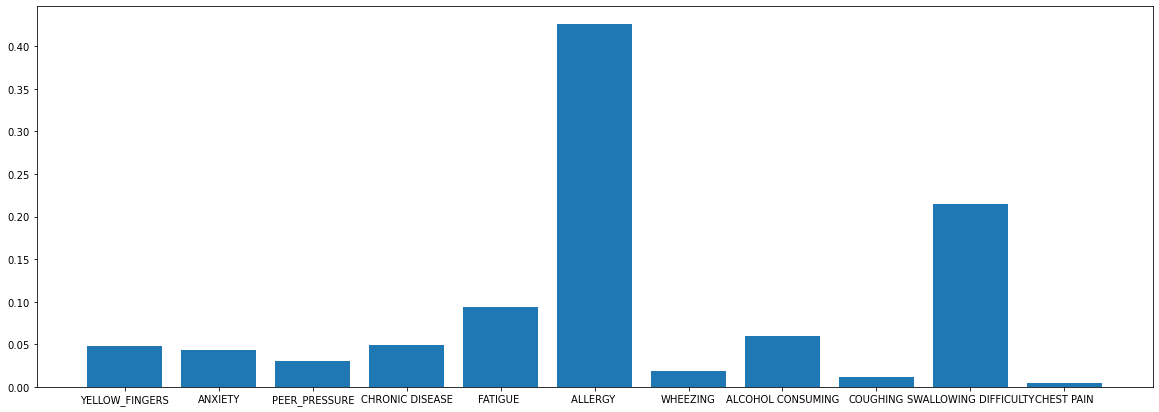

In [64]:
fig = plt.figure(figsize = (20, 7))
plt.bar(X_res.columns, gridsearch_clf_dtree.best_estimator_.feature_importances_)

In [65]:
explainer_dtree=shap.Explainer(gridsearch_clf_dtree.best_estimator_.predict,X_train, seed=4)
print(explainer_dtree)
shap_val_dtree=explainer_dtree(X_train)

shap.explainers.Permutation()


Permutation explainer: 443it [00:14, 10.29it/s]                         


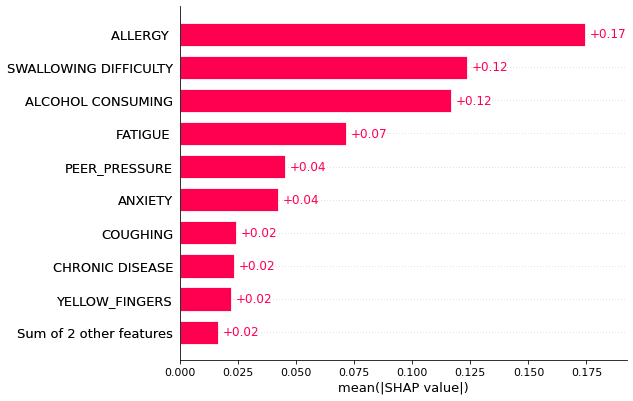

In [66]:
shap.plots.bar(shap_val_dtree)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_rf=RandomForestClassifier(random_state=2)

In [69]:
param_grid_rf={'n_estimators':[20,50,100],'criterion':['gini','entropy'], 'max_depth':[5,10,20], 'min_samples_split':[2,3,5]}

In [70]:
gridsearch_clf_rf= GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, verbose=3)
gridsearch_clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=20;, score=0.899 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=20;, score=0.955 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=20;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=20;, score=0.943 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=20;, score=0.989 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50;, score=0.910 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50;, score=0.955 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, 

[CV 4/5] END criterion=gini, max_depth=10, min_samples_split=3, n_estimators=100;, score=0.932 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_split=3, n_estimators=100;, score=0.977 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=20;, score=0.899 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=20;, score=0.944 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=20;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=20;, score=0.955 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=20;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=50;, score=0.899 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=50;, score=0.944 

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.955 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.920 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.943 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.989 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=20;, score=0.899 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=20;, score=0.955 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=20;, score=0.943 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimators=20;, score=0.943 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_split=3, n_estimato

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=50;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=50;, score=0.943 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=50;, score=0.977 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100;, score=0.910 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100;, score=0.944 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100;, score=0.920 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100;, score=0.943 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100;, score=0.989 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_split=2, 

GridSearchCV(estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [20, 50, 100]},
             verbose=3)

In [71]:
gridsearch_clf_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [72]:
y_pred_test=gridsearch_clf_rf.predict(X_test)

In [73]:
cl_report=classification_report(y_test,y_pred_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.94      0.94      0.94        50

    accuracy                           0.95       111
   macro avg       0.95      0.95      0.95       111
weighted avg       0.95      0.95      0.95       111



In [74]:
gridsearch_clf_rf.best_estimator_.feature_importances_

array([0.07632115, 0.05393104, 0.07256729, 0.04704404, 0.08721389,
       0.21285331, 0.05615897, 0.16538345, 0.04516097, 0.13151639,
       0.0518495 ])

<BarContainer object of 11 artists>

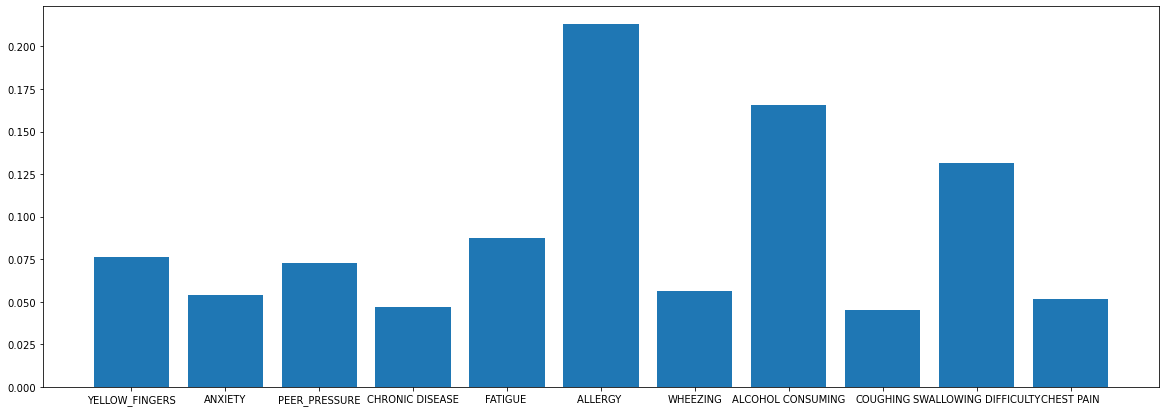

In [75]:
fig = plt.figure(figsize = (20, 7))
plt.bar(X_res.columns, gridsearch_clf_rf.best_estimator_.feature_importances_)

In [76]:
explainer_rf=shap.Explainer(gridsearch_clf_rf.best_estimator_.predict, X_train, seed=5)
shap_val_rf=explainer_rf(X_train)

Permutation explainer: 443it [00:39,  8.21it/s]                         


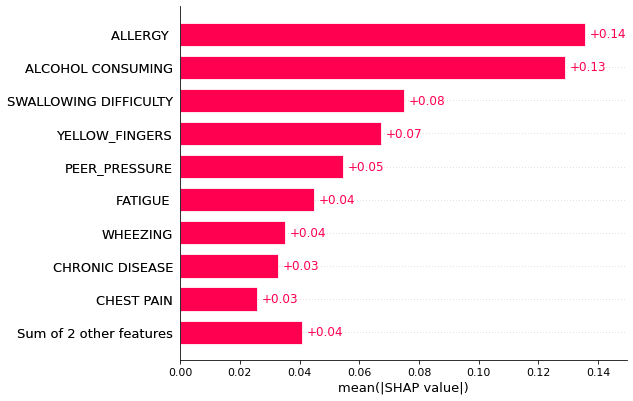

In [77]:
shap.plots.bar(shap_val_rf)

In [78]:
from shap import maskers
explainer_rf_2=shap.Explainer(gridsearch_clf_rf.best_estimator_)
print(explainer_rf_2)
shap_val_rf_2=explainer_rf_2.shap_values(X_train)

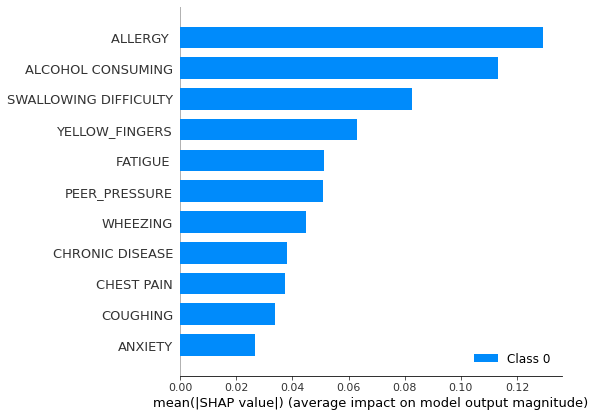

In [79]:
shap.summary_plot(shap_val_rf_2, plot_type="bar", feature_names=list(X_train.columns.values), class_inds=[0])

# Tree Explainer

In [80]:
explainer_rf_tree = shap.TreeExplainer(model= gridsearch_clf_rf.best_estimator_,
                                       data = None,
                                       feature_perturbation='tree_path_dependent',
                                       model_output='raw')
explainer_rf_tree

## 1a. Here is summary of parameters used here:
- model: A tree based model. Following models are supported by Tree SHAP at present: **XGBoost, LightGBM, CatBoost, Pyspark & most tree-based models in scikit-learn**.
- data: Dataset to compute marginal contributions of feature variables in Tree SHAP algorithm. This is an optional argument with a default value of None. Unless provided, the training dataset will be used as explained in the algorithm section above.
- feature_perturbation: Can take two values. ‘tree_path_dependent’ is the default value when the data argument is None. ‘interventional’ is the default value if a data argument is provided. Interventional approach uses the shared dataset to compute conditional expectations in the presence of correlated input features. “tree_path_dependent” approach on the other hand uses the training dataset and the number of samples that fall into each node as explained in the algorithm section.
- model_output: With model_output=’raw’ (default), SHAP values explain the raw predictions from the leaf nodes of the trees. Since most gradient boosting classification models predict logit (log-odds) in their leaf nodes, SHAP values explain the logit prediction for GBM models by default. See the explanation here. Other possible values are “probability”, “log_loss”, or any model method name. With “log_loss” SHAP values explain the log of model’s loss function. See shap.TreeExplainer for more details.


In [81]:
shap_values_tree  =np.array(explainer_rf_tree.shap_values(X_test))
shap_values_tree.shape

(2, 111, 11)

## 1b. Interpreting shap values, and single Prediction from tree model

- **For classification problems**, explainer.shap_values() return a list of size n_classes. Since this is a binary classification model n_classes=2. Each object of this list is an array of size [n_samples, n_features] and corresponds to the SHAP values for the respective class.

In this example, shap_values[1] is the SHAP values for the positive class (default payment next month = Yes) & shap_values[0] is the SHAP values for the negative class.

- **For regression models**, we get a single set of shap values of size [n_samples, n_features]



In [82]:
# force plot
shap.initjs()
shap.force_plot(explainer_rf_tree.expected_value[1], shap_values_tree[1][0],feature_names=list(X_train.columns.values))

# Waterfall Plots:

For all other plots, using the shap matrix is sufficient, however, for waterfall plot, we need both expected values and shap values, so, we need to provide a shap explaination object, which is returned when we call from created explainer object. Thus, we use direct call from explainer object

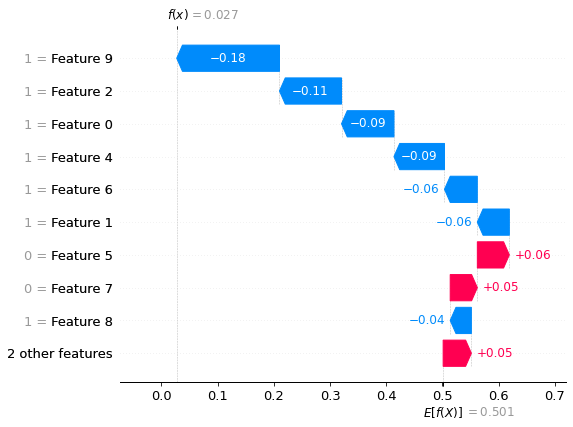

In [83]:
explainer_object_tree = explainer_rf_tree(X_test)

#Create class level explaination object
row_idx = 100
class_idx = 0
exp = shap.Explanation(explainer_object_tree.values[:,:,class_idx], explainer_object_tree.base_values[row_idx][class_idx], explainer_object_tree.data)
shap.plots.waterfall(exp[row_idx])


In [84]:
print(explainer_object_tree)

.values =
array([[[-0.03245214,  0.03245214],
        [-0.05511577,  0.05511577],
        [ 0.04286176, -0.04286176],
        ...,
        [-0.02842352,  0.02842352],
        [-0.12907939,  0.12907939],
        [ 0.03698997, -0.03698997]],

       [[ 0.07806175, -0.07806175],
        [ 0.03202327, -0.03202327],
        [ 0.05306015, -0.05306015],
        ...,
        [ 0.05269181, -0.05269181],
        [ 0.06773758, -0.06773758],
        [ 0.06295616, -0.06295616]],

       [[-0.06027147,  0.06027147],
        [-0.02738516,  0.02738516],
        [ 0.01980318, -0.01980318],
        ...,
        [-0.01822141,  0.01822141],
        [ 0.02565446, -0.02565446],
        [-0.05247495,  0.05247495]],

       ...,

       [[-0.05916133,  0.05916133],
        [-0.03589646,  0.03589646],
        [-0.0498175 ,  0.0498175 ],
        ...,
        [-0.02329152,  0.02329152],
        [-0.10107233,  0.10107233],
        [-0.03249052,  0.03249052]],

       [[-0.0870467 ,  0.0870467 ],
        [-0.03026

## 1c. Explaining predictions for multiple samples (from row 0-9)

Samples are ordered by similarity by default.However, we can change this ordering to be by output value, or by original sample order or by any numeric independent variable in the dataset. The color codes mean the same as in previous chart, with red colored features increasing the logit & the blue colored feature decreasing the logit for each data point.

In [85]:
shap.force_plot(explainer_rf_tree.expected_value[1], shap_values_tree[1][0:10],feature_names=list(X_train.columns.values))

## 1d. Summary Plots

shap.summary_plot() can plot the mean shap values for each class(each class shap values are provided as a list in first parameter) if provided with a list of shap values (the output of explainer.shap_values() for a classification problem)

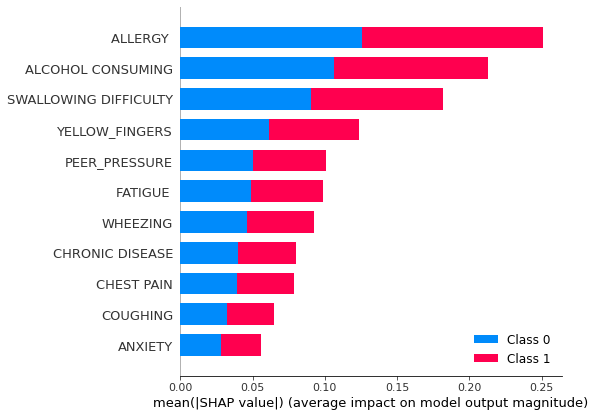

In [86]:
shap.summary_plot([shap_values_tree[0], shap_values_tree[1]], plot_type="bar", feature_names=list(X_test.columns.values))

## 1e. SHAP Density Plots

If provided with a single set of SHAP values (shap values for a single class for a classification problem or shap values for a regression problem), shap.summary_plot() creates a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output. Features are sorted by the sum of the SHAP value magnitudes across all samples.

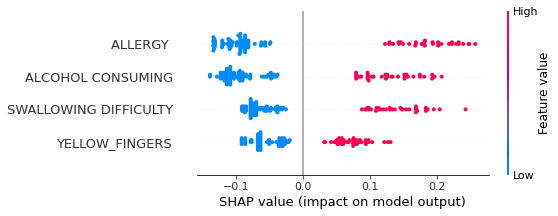

In [87]:
# with max_display, we can control what top-k features we want to plot density plot for.
shap.summary_plot(shap_values_tree[1], feature_names=list(X_test.columns.values),max_display=4, features=X_test)

## 1f. SHAP dependence plots:
We can create shap dependence plot with two features interacting, Let's say we interact swallowing difficuly, and yellow fingers as an interaction value, Here is how we will create the dependence plots.
Here we are studying shap values for class 1.

We can use **display_features** variable to use actual categorical values instead of integer encoding(explained during walkthrough)


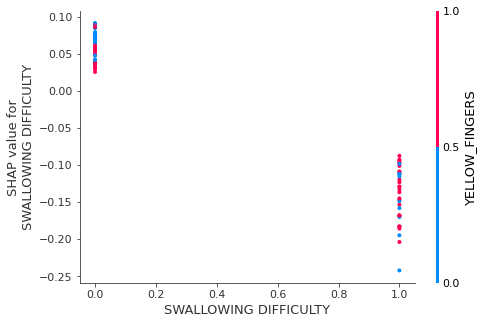

In [88]:
shap.dependence_plot('SWALLOWING DIFFICULTY',shap_values_tree[0], features=X_test, display_features=X_test, feature_names= list(X_test.columns.values),interaction_index='YELLOW_FINGERS')

## 1g: SHAP Dependence with maximum interaction feature for a given variable.

SHAP can also select the interaction variable that seems to have the strongest interaction with the main variable. Lets create a shap dependence plot for top 3 features with highest impact on the model (mean shap values).

Notice interaction variable is selected automatically as a feature providing strongest interaction


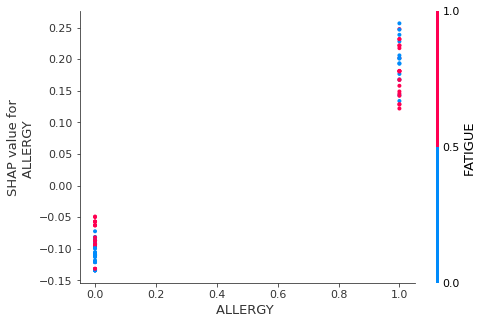

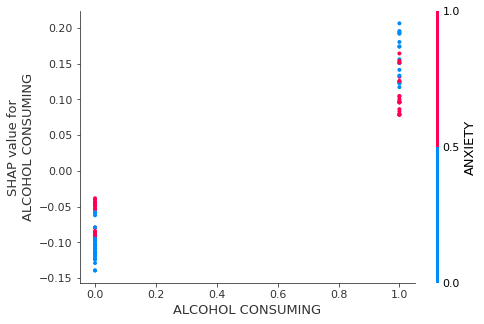

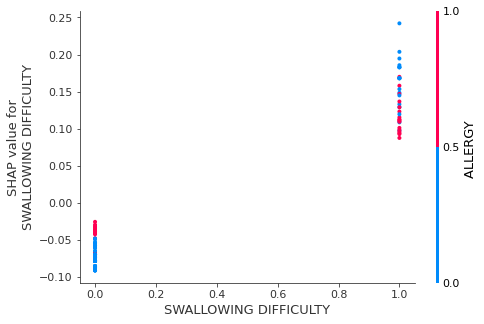

In [89]:
""# Sort the features indexes by their importance in the model (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values_tree[1]), 0))
# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i], shap_values_tree[1], features=X_test, display_features=X_test)

## 1h: Embedding plots

Use the SHAP values as an embedding which we project to 2D for visualization.


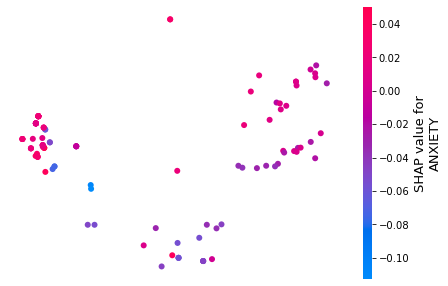

In [90]:
# index of feature provided first is used to color the plot based on actual shap values from that feature over [n_samples,2] shap value embeddings
shap.embedding_plot(1, shap_values_tree[0],feature_names=list(X_test.columns.values), method='pca')

## 1i: Interaction plots: [Medium link here](https://towardsdatascience.com/analysing-interactions-with-shap-8c4a2bc11c2a)

SHAP values are used to explain individual predictions made by a model. It does this by giving the contributions of each factor to the final prediction. SHAP interaction values extend on this by breaking down the contributions into their main and interaction effects. We can use these to highlight and visualise interactions in data. It can also be a useful tool to understand how your model makes predictions.





In [91]:
# get interaction values from explainer

shap_interactions_tree = explainer_rf_tree.shap_interaction_values(X_test)

#Get shape of interaction values
print(np.shape(shap_interactions_tree))

# SHAP interaction values for first observation in test set
pd.DataFrame(shap_interactions_tree[0][0],index=X_test.columns,columns=X_test.columns)

(2, 111, 11, 11)


,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
YELLOW_FINGERS,-0.094359,-0.006215,0.005653,0.007213,0.007872,0.003260,0.002179,0.011185,0.010533,0.022983,-0.002757
ANXIETY,-0.006215,-0.044248,-0.002639,0.003533,0.002849,-0.010924,-0.011164,0.013621,0.000015,0.004311,-0.004253
PEER_PRESSURE,0.005653,-0.002639,0.050836,0.003811,0.002286,0.002288,-0.013942,-0.018487,0.001680,0.009596,0.001781
CHRONIC DISEASE,0.007213,0.003533,0.003811,0.026559,0.011927,0.002026,-0.003284,-0.005245,-0.000783,0.015400,0.000644
FATIGUE,0.007872,0.002849,0.002286,0.011927,0.036970,0.009790,0.004830,0.001761,0.003317,0.003555,0.004588
ALLERGY,0.003260,-0.010924,0.002288,0.002026,0.009790,0.109262,-0.016474,0.001111,-0.005443,-0.011116,0.003127
WHEEZING,0.002179,-0.011164,-0.013942,-0.003284,0.004830,-0.016474,-0.072688,-0.003421,0.006002,-0.007702,0.006473
ALCOHOL CONSUMING,0.011185,0.013621,-0.018487,-0.005245,0.001761,0.001111,-0.003421,-0.193325,-0.000775,0.044652,-0.002044
COUGHING,0.010533,0.000015,0.001680,-0.000783,0.003317,-0.005443,0.006002,-0.000775,-0.045435,0.001295,0.001172
SWALLOWING DIFFICULTY,0.022983,0.004311,0.009596,0.015400,0.003555,-0.011116,-0.007702,0.044652,0.001295,-0.207416,-0.004637


The matrix tells us how much each factor contributed to the model's prediction when compared to the mean prediction. This is a similar interpretation to standard SHAP values except the contributions are broken down into main and interaction effects. The main effects are given on the diagonals. The interaction effects are given on the off diagonals. These values are halved so, for example, the yellow fever.anxiety interaction decreased the prediction log-probability by (-0.006215 x 2).

If you add up all the values in the contribution matrix and add the expected value you will get the models actual value for observation.

## Absolute mean plot
To start we will calculate the absolute mean for each cell across all 1000 matrices. We take the absolute values as we do not want positive and negative SHAP values to offset each other. Because the interaction effects are halved, we also multiply the off diagonals by 2. We then display this as a heatmap.

This plot can be used to highlight important main effects and interaction effects

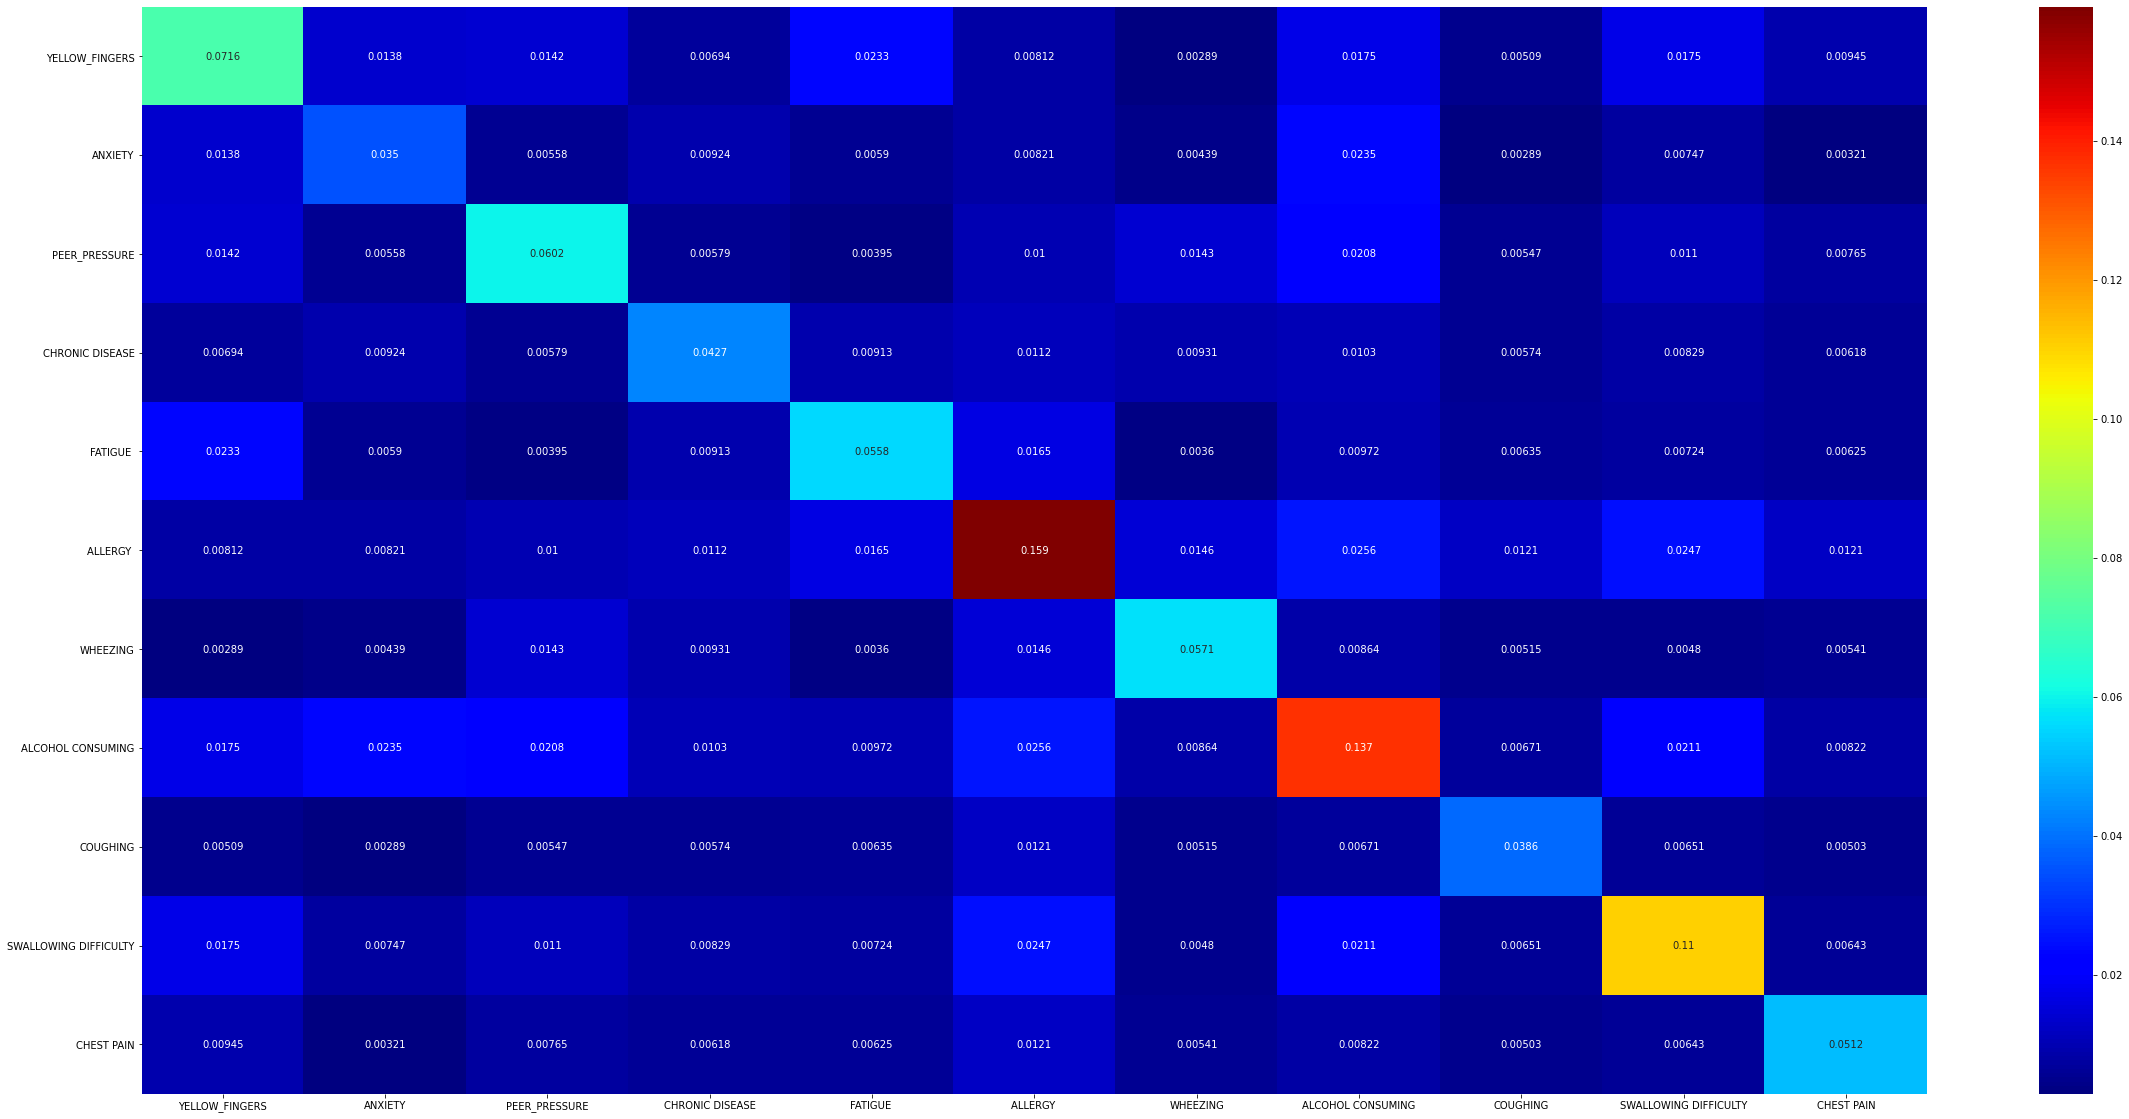

In [92]:
# Get absolute mean of matrices
mean_shap_interaction = np.abs(shap_interactions_tree[0]).mean(axis=0)
df = pd.DataFrame(mean_shap_interaction,index=X.columns,columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display
plt.figure(figsize=(40, 20), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)
sns.heatmap(df,cmap='jet',annot=True,fmt='.3g',cbar=True)
_ = plt.yticks(rotation=0)

## Summary Plots for interactions

With the SHAP interaction values, we can extend on our density(or beeswarm) plot by using the summary plot in the code below. Here the SHAP values for the main effects are given on the diagonals and the off-diagonals give the interaction effects. For this plot, the interaction effects have already been doubled. Like with the beeswarm plot, the colours are given by the feature value for the feature on the y-axis.

<Figure size 2880x1440 with 0 Axes>

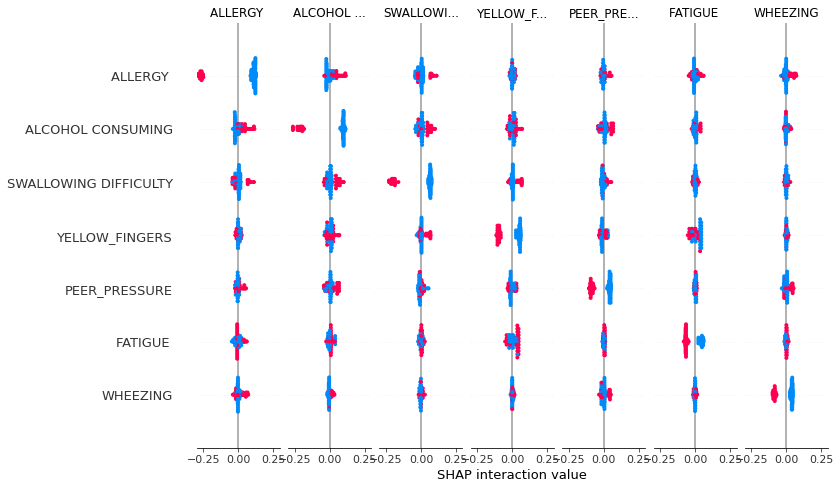

In [93]:
# display
plt.figure(figsize=(40, 20), facecolor='w', edgecolor='k')
shap.summary_plot(shap_interactions_tree[0], X_test)

## Dependence plots for interactions:

We can use dependence plots to better understand the nature of the interactions. Below, you can see the code used to create the dependence plot for the Anxiety * Coughing interaction.

In [94]:
X_test.columns

Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

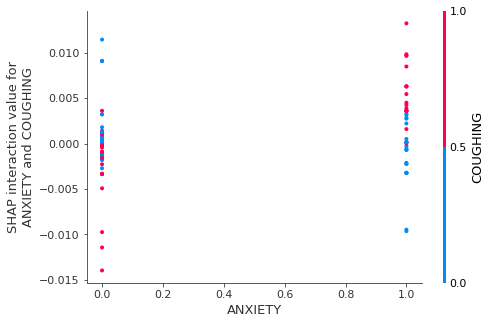

In [95]:
shap.dependence_plot(
    (1, 8), # indexes of corresponsing features
    shap_interactions_tree[0], X_test,
    display_features=X_test,
    feature_names=list(X_test.columns.values))

## 1j: Decision plots: Decision plots are an amplified version of force plots, they show how models arrive at decision.

- Look at this medium article for details understanding on decision plots: [Understanding Decision Plots](https://towardsdatascience.com/introducing-shap-decision-plots-52ed3b4a1cba)
- For shap implementations, look here: [Decision Plots Implementation](https://github.com/slundberg/shap/blob/master/notebooks/api_examples/plots/decision_plot.ipynb)


# Kernal SHAP

Kernel SHAP is a model agnostic method to approximate SHAP values using ideas from LIME and Shapley values. This is my second article on SHAP. Refer to my previous post here for a theoretical introduction to SHAP.

### What is LIME?
Local Interpretable Model-agnostic Explanations (LIME) is a technique of explaining the predictions of a black box machine learning model by building a number of interpretable local surrogate models (like linear regression). Surrogate models are trained on the predictions of the underlying black box model. The recipe to train local surrogate models is:

- Select the instance of interest xᵢ for which you want to have an explanation for it’s black box model prediction.
- Generate a new dataset by perturbing the feature values of xᵢ. We do not use the actual feature values of xᵢ for the surrogate models, but a simplified binary version (zᵢ) is constructed as follows: If x∈Rᴾ is the original representation of xᵢ, the simplified binary version (called interpretable representation²) is zᵢ∈{0, 1}ᴾ. For example if xᵢ = (x₁, x₂, x₃), the corresponding interpretable representation zᵢ is given by zᵢ = (z₁, z₂, z₃), where each of z₁, z₂ and z₃ may take values 0 or 1.
- Note the predictions of the black box model for each perturbed sample zᵢ. The predictions are obtained by mapping zᵢ back to the original representation Rᴾ as follows: a ‘1’ in zᵢ is mapped to the actual feature value & a ‘0’ is mapped to an appropriate non-informative value according to the type of the dataset. Refer to Understanding how LIME explains predictions & Understanding lime to understand the treatments for tabular, text and image datasets. The SHAP KernelExplainer() function (explained below) replaces a ‘0’ in the simplified representation zᵢ with a random sample value for the respective feature from a given background dataset. Thus, the independent variables for the local surrogate model are a bunch of ones and zeroes and the dependent variable is the prediction obtained. However, this process of computing feature contributions make additional assumptions of feature independence and model linearity, at-least locally around the proximity of xᵢ.
- Weight the new samples according to their proximity to the instance of interest (xᵢ).
- Train an interpretable model (like linear regression, lasso, decision tree etc.) on this new dataset.
- Explain the prediction of the black box model by interpreting the local model (also called the explanation model).

LIME requires the user to select the complexity of local surrogate model and an appropriate kernel function to assign weights to sample in the generated dataset.

## Kernel SHAP: Linear LIME + Shapley Values

In the SHAP paper³ the authors show that with a weighted linear regression model as the local surrogate model and an appropriate weighting kernel, the regression coefficients of the LIME surrogate model estimates the SHAP values. The Shapley kernel that recovers SHAP values is given by:

![SHAP Image](shap_img.png)

Once shap values are evaluated, rest of the plotting functions are similar to tree shap, Example is provided below with a logistic regression model this dataset.

In [96]:
model_lg=LogisticRegression(random_state=0)
model_lg.fit(X_train.values, y_train.values)

LogisticRegression(random_state=0)

In [97]:

explainer_lg_kernal = shap.KernelExplainer(model=model_lg.predict_proba,
                                           data=shap.sample(X_train,100),
                                           feature_names=list(X_train.columns.values),
                                           link='logit')
# Ignore the error (X does not have valid feature names, but LogisticRegression was fitted with feature names), converting X_train dataframe to np array (X_train.values) before fitting removes the warning. This is probably a library issue.

## Arguments of KernelExplainer() function:

- model: The model to be explained. The output of the model can be a vector of size n_samples or a matrix of size [n_samples x n_output] (for a classification model).
- data: Background dataset to generate the perturbed dataset required for training surrogate models. We simulate “missing” (‘0’s in zᵢ) by replacing the feature with the values it takes in the background dataset. So if the background dataset is a simple sample of all zeros, then we would approximate a feature being missing by setting it to zero. For small problems this background dataset can be the whole training set, but for larger problems consider using a single reference value or using the kmeans function to summarize the dataset.
- link: A function to connect feature contribution values to the model output. For a classification model, we generally explain the logit of the predicted probability as a sum of feature contributions. Hence, if the output of the “model” (the first argument) is a probability, we set link = “logit” to get the feature contributions in logit form.


Next we compute shap values as below.

In [98]:
shap_values_kernel = explainer_lg_kernal.shap_values(X_test,nsamples=100, l1_reg='num_features(4)')

  0%|          | 0/111 [00:00<?, ?it/s]

## Arguments of explainer.shap_values() function:

- X: Dataset on which to explain the model output.
- nsamples: No. of samples to draw to build the surrogate model for explaining each prediction.
- l1_reg: The l1 regularization to use for selecting features to explain the model prediction. Possible values are: “num_features(<int>)”-Selects a fixed number of features to explain the model prediction; “aic”/”bic”-Uses AIC/BIC rules for regularization; <float>-Sets the alpha parameter for sklearn.linear_model.lasso; “auto”-Uses AIC when less than 20% of possible sample space is enumerated, otherwise uses no regularization.

## Output dimensions of shap_values:

For classification problems, explainer.shap_values() return a list of size n_classes (number of classes). For a binary classification model n_classes=2 (negative & positive class). Each object of this list is an array of size [n_samples, n_features] and corresponds to the SHAP values for the respective class. For regression models, we get a single set of shap values of size [n_samples, n_features].

In [99]:
len(shap_values_kernel), shap_values_kernel[0].shape, shap_values_kernel[1].shape

(2, (111, 11), (111, 11))

In [100]:
# Explaining Single prediction
shap.initjs()
shap.force_plot(explainer_lg_kernal.expected_value[1], shap_values_kernel[1][0],feature_names=list(X_train.columns.values))

In [101]:
# Explaining predictions for multiple samples (from row 0-9)
shap.force_plot(explainer_lg_kernal.expected_value[1], shap_values_kernel[1][0:10],feature_names=list(X_train.columns.values))

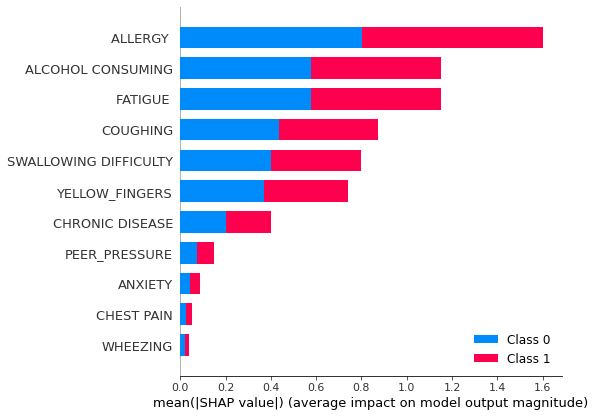

In [102]:
# Summary Plots
shap.summary_plot([shap_values_kernel[0], shap_values_kernel[1]], plot_type="bar", feature_names=list(X_test.columns.values))

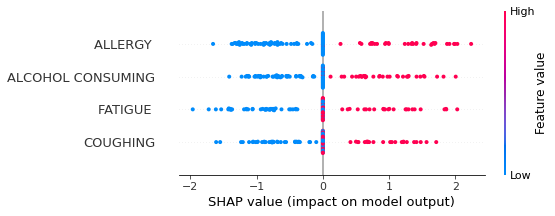

In [103]:
# Density Plot
shap.summary_plot(shap_values_kernel[1], feature_names=list(X_test.columns.values),max_display=4, features=X_test)

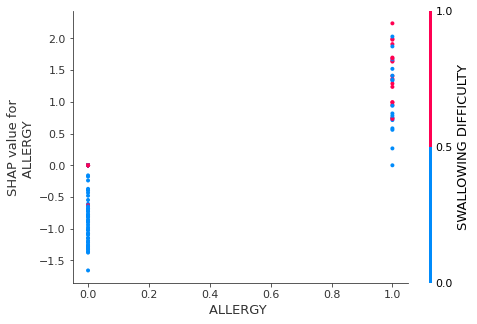

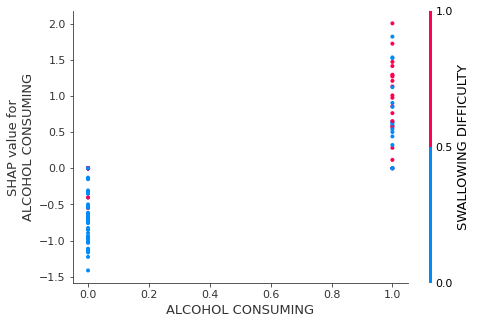

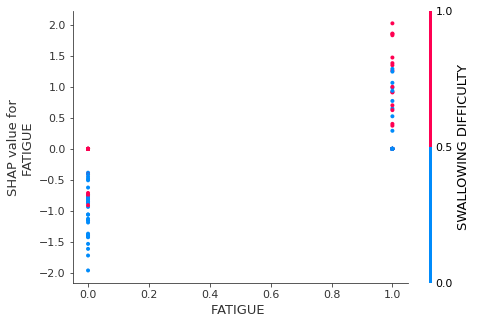

In [104]:
# Dependence Plots with top features

# Sort the features indexes by their importance in the model (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values_kernel[1]), 0))
# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i], shap_values_kernel[1], features=X_test, display_features=X_test)



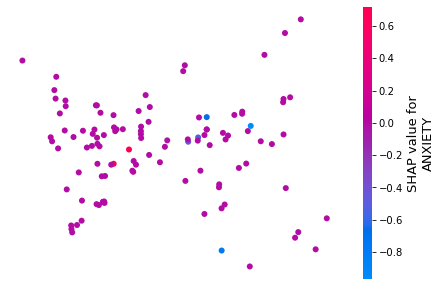

In [105]:
# Embedding plots

# index of feature provided first is used to color the plot based on actual shap values from that feature over [n_samples,2] shap value embeddings
shap.embedding_plot(1, shap_values_kernel[0],feature_names=list(X_test.columns.values), method='pca')

## [Appendix] Other interesting explainers:

### [A1]: Deep Model Explainers
**Gradient Explainer**, and **DeepExplainer** are used to evaluate feature dependence of a prediction based on gradients. We will use this method while explaining images in a diabetic retinopathy classification, but it cannot run on tabular data.

[Understanding Gradient Based Explainers and when to use it](https://www.fiddler.ai/blog/should-you-explain-your-predictions-with-shap-or-ig)
Or you can look here as well

[Offical example for gradient explainers](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/gradient_explainer/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet.html)

### [A2]: Permutation Explainer:

What is Permutation Feature Importance? As the name suggests, it is a type of feature importance measure that is generated through permuting the feature of interest (hence the name “permutation”). Permuting here means shuffling the values in the feature randomly as you can see from the info-graphic table below.


Example from Kaggle’s Course in Model Explainability
The basic idea is that a feature is considered to be “important” to the model if model error or loss increases after the shuffling since it implies that the model put more weight on the feature for the prediction. Conversely, a feature is “unimportant” if the model error or loss does not change or even increase (by chance) after shuffling the feature because in this case the prediction quality was not affected by the change in the feature.

Simply put, permutation feature importance can be understood as the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

[If interested to dwell into it, See more details here...](https://medium.com/geekculture/explainable-ai-xai-methods-part-4-permutation-feature-importance-72b8a5d9be05)
[And Here...](https://medium.com/@gauravagarwal_14599/explainable-ai-xai-permutation-feature-importance-7be0da6f0600)


### [A2]: Partition Explainer

This is an improved(fast) version of KernelSHAP, which computes Shapley values recursively through a hierarchy of features, this hierarchy defines feature coalitions and results in the Owen values from game theory. However this is specifically tuned for language based input and models.

[If interested, more details can be found here for partition explainer...](https://towardsdatascience.com/shaps-partition-explainer-for-language-models-ec2e7a6c1b77)


### [A3]: Other older explainers, LinearExplainer, AdditiveExplainer, SamplingExplainer:

These explainers are invented before Kernel and Tree Explainers, thus are irrelevant if we are use more powerful methods already.





In [106]:
#pip install xgboost

In [107]:
import xgboost as xgb

In [108]:
model_xgb = xgb.XGBClassifier(min_child_weight=0, objective = 'binary:logistic', eval_metric='auc')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=0,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [109]:
    expected_y  = y_test
    predicted_y = model.predict(X_test)

In [110]:
model_xgb.feature_importances_

array([0.02542244, 0.0105273 , 0.01523539, 0.03220021, 0.05195466,
       0.44071028, 0.0187588 , 0.03083503, 0.02299389, 0.34213996,
       0.00922206], dtype=float32)

In [111]:
from sklearn import metrics

In [112]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.96      0.94      0.95        50

    accuracy                           0.95       111
   macro avg       0.96      0.95      0.95       111
weighted avg       0.96      0.95      0.95       111



In [113]:
explainer_xgb_tree = shap.TreeExplainer(model= model_xgb)

In [114]:
explainer_xgb_tree.expected_value

array([0.14065048])

In [115]:
shap_values_tree_xgb  =np.array(explainer_xgb_tree.shap_values(X_test, approximate=True))
shap_values_tree_xgb.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(111, 11)

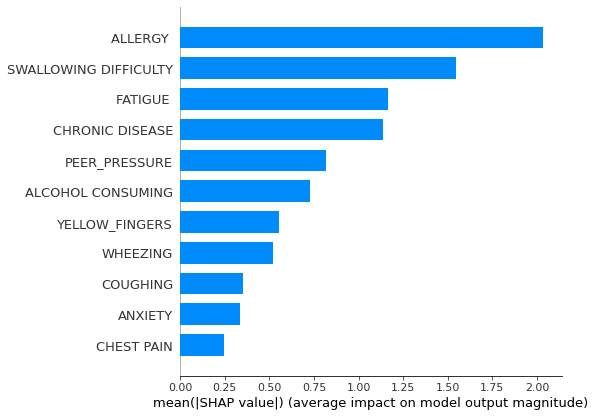

In [116]:
shap.summary_plot(shap_values_tree_xgb, plot_type="bar", feature_names=list(X_test.columns.values))